In [1]:
from sklearn.svm import SVC
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
Xtr, Ytr = mnist.train.next_batch(60000) #5000 for training (ntr
Xte, Yte = mnist.train.next_batch(10000) #5000 for training

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Picking 20000 training and 2000 test samples. 

In [3]:
xTrain=Xtr[:20000,:]
xTest=Xte[:2000,:]
yTrain=np.array([i.nonzero()[0][0] for i in Ytr])[:20000]
yTest=np.array([i.nonzero()[0][0] for i in Yte])[:2000]


In [ ]:
accuracy_all=[]
for c in [2,-1,0,1,2]:
    clf=SVC(C=10**c, kernel='rbf', gamma='auto', tol=0.001, probability=False,
        cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
        decision_function_shape='ovr', random_state=None)
    clf.fit(xTrain,yTrain)
    preds=clf.predict(xTest)
    accuracy=sum([1 for i,j in zip(preds,yTest) if i==j])/len(preds)*100
    accuracy_all.append((c,accuracy))
    
    

In [4]:
for c in [3]:
    clf=SVC(C=10**c, kernel='rbf', gamma='auto', tol=0.001, probability=False,
        cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
        decision_function_shape='ovr', random_state=None)
    clf.fit(xTrain,yTrain)
    preds=clf.predict(xTest)
    accuracy=sum([1 for i,j in zip(preds,yTest) if i==j])/len(preds)*100
    #accuracy_all.append((c,accuracy))
    
    

In [6]:
accuracy_all

[(2, 97.45),
 (-1, 89.3),
 (0, 93.30000000000001),
 (1, 95.55),
 (2, 97.45),
 (3, 97.75)]

In [40]:
import pandas as pd

df=pd.DataFrame(prob_table[:10])

df.insert(0,'Actual Label',yTest[:10])

df

In [58]:
df

,Actual Label,0,1,2,3,4,5,6,7,8,9
0,7,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.999,0.000,0.000
1,3,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2,8,0.035,0.000,0.003,0.000,0.001,0.000,0.001,0.000,0.959,0.001
3,9,0.000,0.000,0.000,0.002,0.001,0.001,0.000,0.001,0.004,0.990
4,7,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.991,0.000,0.008
5,7,0.001,0.000,0.005,0.000,0.000,0.003,0.000,0.971,0.000,0.020
6,6,0.000,0.000,0.002,0.000,0.000,0.000,0.998,0.000,0.000,0.000
7,1,0.000,0.985,0.001,0.001,0.000,0.001,0.000,0.003,0.009,0.000
8,5,0.000,0.001,0.001,0.002,0.000,0.985,0.000,0.000,0.010,0.001
9,1,0.000,0.980,0.009,0.003,0.000,0.000,0.000,0.005,0.002,0.000


In [8]:
from sklearn import metrics
cm=metrics.confusion_matrix(preds,yTest,[i for i in range(0,10)])


In [9]:
% matplotlib inline
from matplotlib import pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[182   0   1   0   0   0   1   0   1   0]
 [  0 200   1   0   2   0   0   0   1   0]
 [  0   1 207   0   0   1   0   0   1   0]
 [  0   0   1 193   0   4   0   0   2   1]
 [  0   0   1   0 212   2   1   0   1   1]
 [  1   0   0   1   0 163   1   0   0   1]
 [  0   0   0   0   0   1 198   0   0   0]
 [  0   0   0   2   1   0   0 186   0   1]
 [  0   0   1   1   0   2   1   0 213   0]
 [  0   0   0   1   3   0   0   4   0 200]]


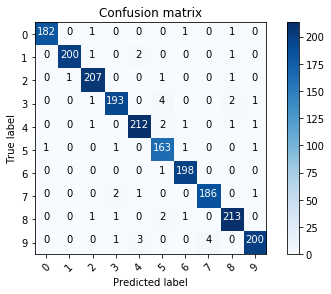

In [10]:
plot_confusion_matrix(cm,[i for i in range(10)])

In [12]:
print(metrics.classification_report(preds,yTest))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       185
          1       1.00      0.98      0.99       204
          2       0.98      0.99      0.98       210
          3       0.97      0.96      0.97       201
          4       0.97      0.97      0.97       218
          5       0.94      0.98      0.96       167
          6       0.98      0.99      0.99       199
          7       0.98      0.98      0.98       190
          8       0.97      0.98      0.97       218
          9       0.98      0.96      0.97       208

avg / total       0.98      0.98      0.98      2000

